In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# CWT Plot of White Noise by PRNGs

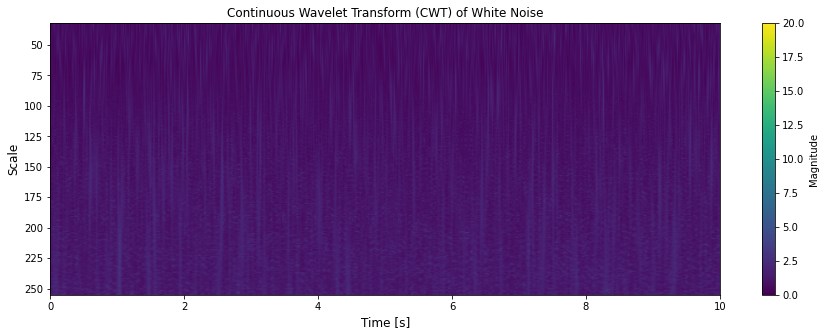

In [2]:
# Parameters for the simulation
fs_original = 1e6  # Original sampling frequency (1 MHz)
duration = 10  # Duration of the signal in seconds
n_samples = int(fs_original * duration)  # Number of samples

# Generate white noise
np.random.seed(42)  # For reproducibility
signal = np.random.normal(0, 1, n_samples)

# Perform downsampling
sample_rate = 100  # Downsampling factor
sampled_signal = signal[::sample_rate]
fs_downsampled = fs_original / sample_rate
duration_downsampled = len(sampled_signal) / fs_downsampled

# Define the time vector for the downsampled signal
time_vector = np.linspace(0, duration_downsampled, len(sampled_signal), endpoint=False)

# Define the scales for the CWT
scales = np.arange(32, 256)  # Adjust this range based on the frequencies you are interested in

# Choose your wavelet
wavelet_name = 'morl'  # Morlet wavelet

# Calculate the frequencies corresponding to the scales
frequencies = pywt.scale2frequency(wavelet_name, scales) * fs_downsampled

# Perform the CWT
cwt_matr, freqs = pywt.cwt(sampled_signal, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Plot the wavelet transform result
plt.figure(figsize=(15, 5))
plt.imshow(np.abs(cwt_matr), extent=[0, duration_downsampled, scales[-1], scales[0]], cmap='viridis', aspect='auto',
           vmin=0, vmax=20)  # Adjust vmin and vmax based on the range of your data
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) of White Noise', fontsize = 12)
plt.ylabel('Scale', fontsize = 12)
plt.xlabel('Time [s]', fontsize = 12)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_PRNG.png')

plt.show()


# Morlet Wavelet

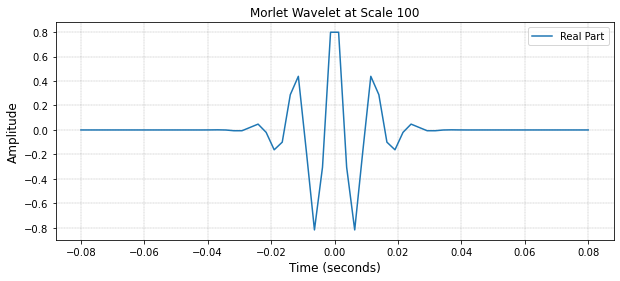

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Parameters
scale = 100  # Choose an arbitrary scale
fs_downsampled = 1e4  # Downsampled frequency, e.g., 10 kHz

# Generate time vector centered around zero
t = np.linspace(-1, 1, int(fs_downsampled))  # 1 second span

# Compute the wavelet function at this scale
wavelet = pywt.ContinuousWavelet('morl')
psi, x = wavelet.wavefun(level=int(np.log2(scale)))

# Adjust x to reflect the scale and sampling frequency
x = x * scale / fs_downsampled

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(x, np.real(psi), label='Real Part')
plt.title(f'Morlet Wavelet at Scale {scale}', fontsize = 12)
plt.xlabel('Time (seconds)', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.legend()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv.png')

plt.show()


# CWT Plot of BJT based Noise Generators

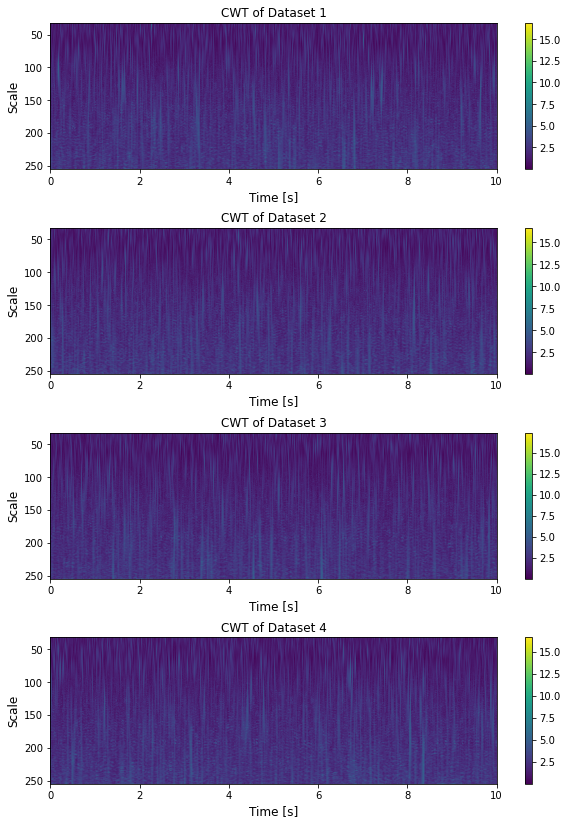

In [4]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_BJT1_LP.png')

plt.show()


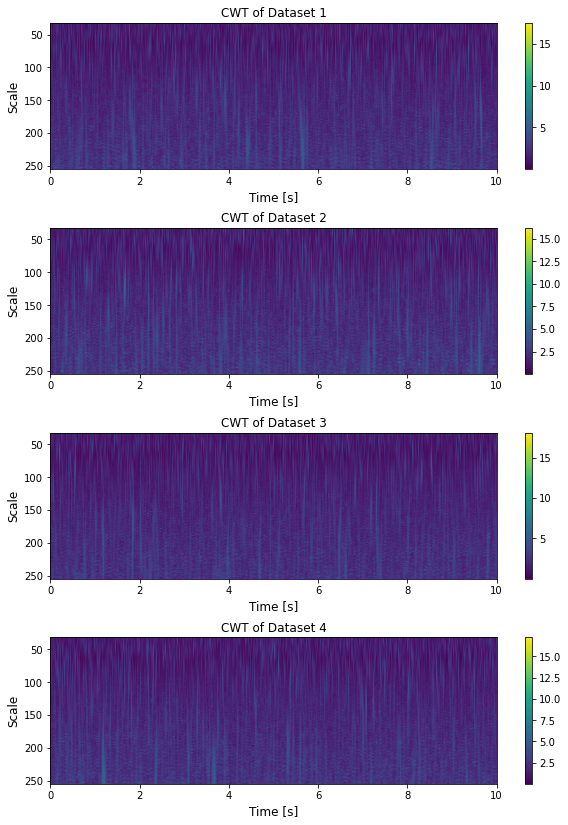

In [5]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_BJT1_no_LP.png')

plt.show()


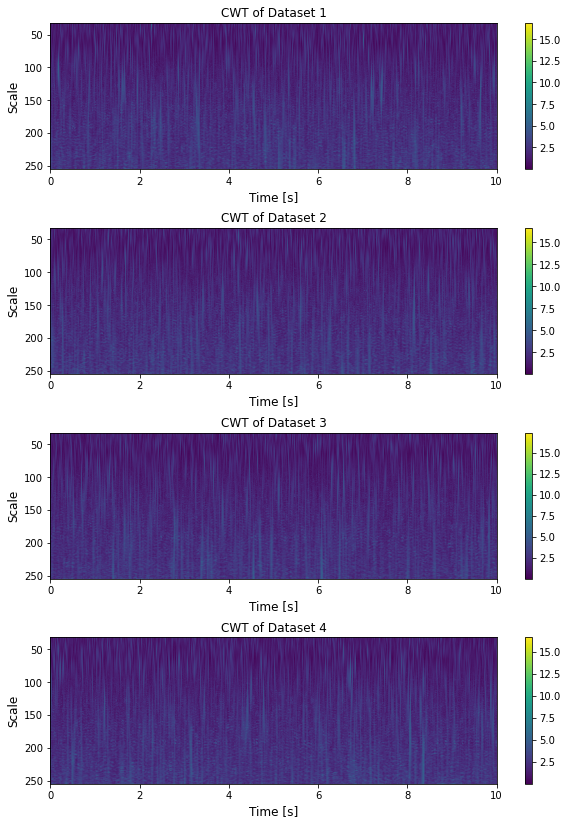

In [6]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_BJT2_LP.png')

plt.show()


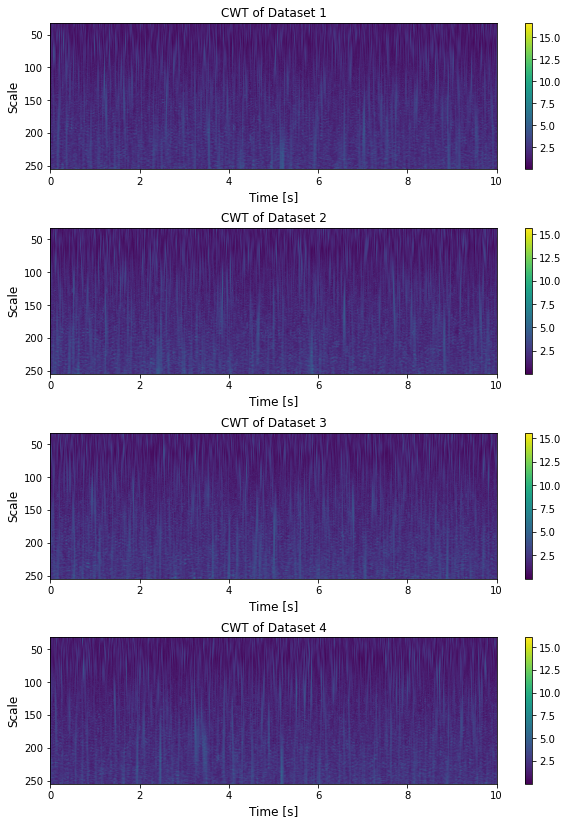

In [7]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_BJT2_no_LP.png')

plt.show()


# CWT Plots of HP-3722 A Noise Generator

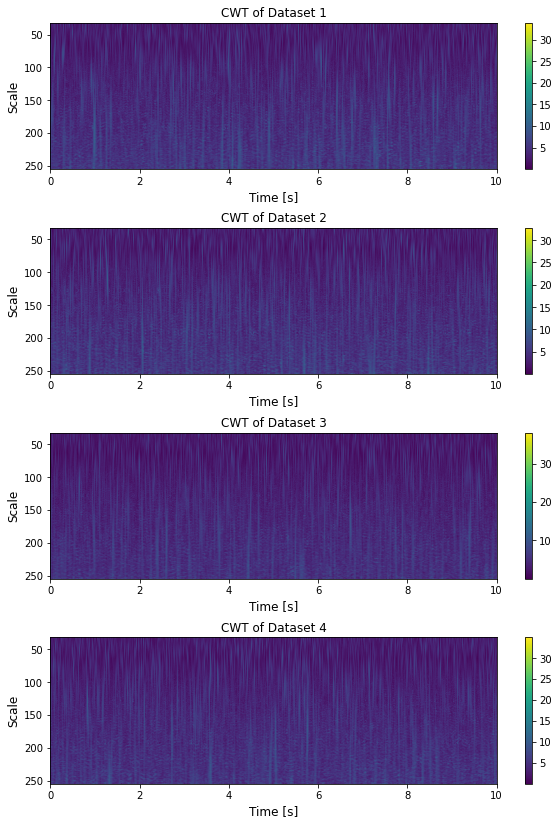

In [8]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_HP.png')

plt.show()


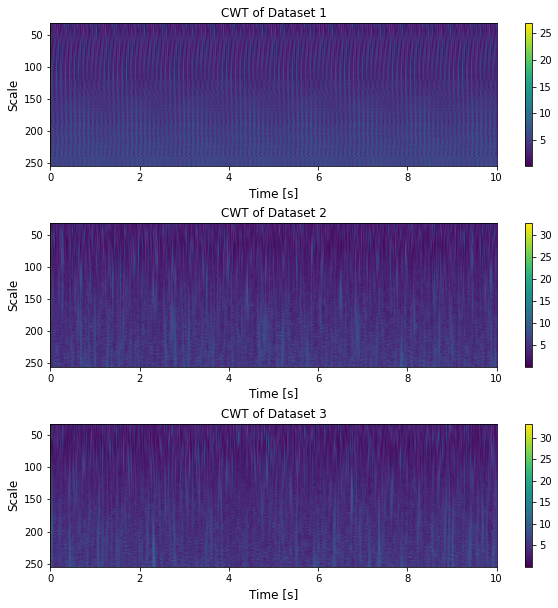

In [9]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/HP/pseudo_random_50kHz_seqlen_8191_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/pseudo_random_50kHz_seqlen_262143_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/pseudo_random_50kHz_seqlen_1048575_1.csv",
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_HP_PRNG.png')

plt.show()


# CWT Plots of WG-RG1 Noise Generator

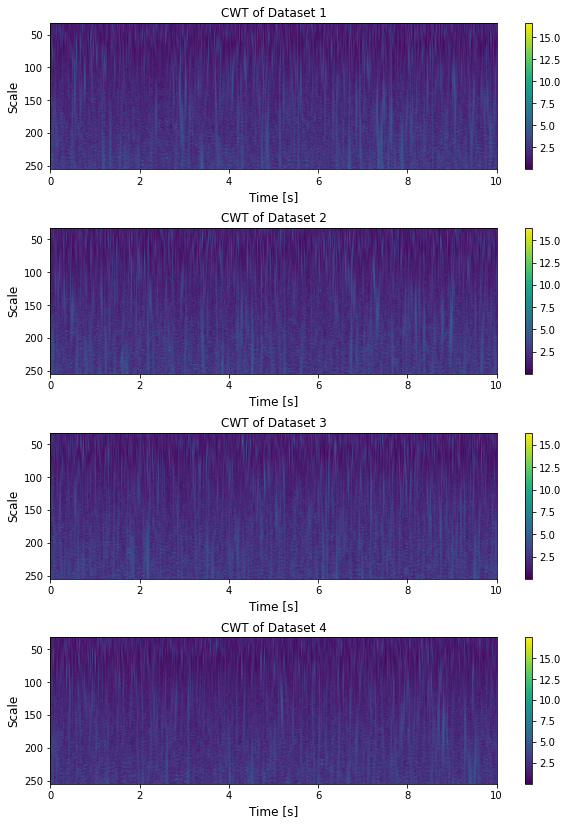

In [10]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_WG_16.png')

plt.show()


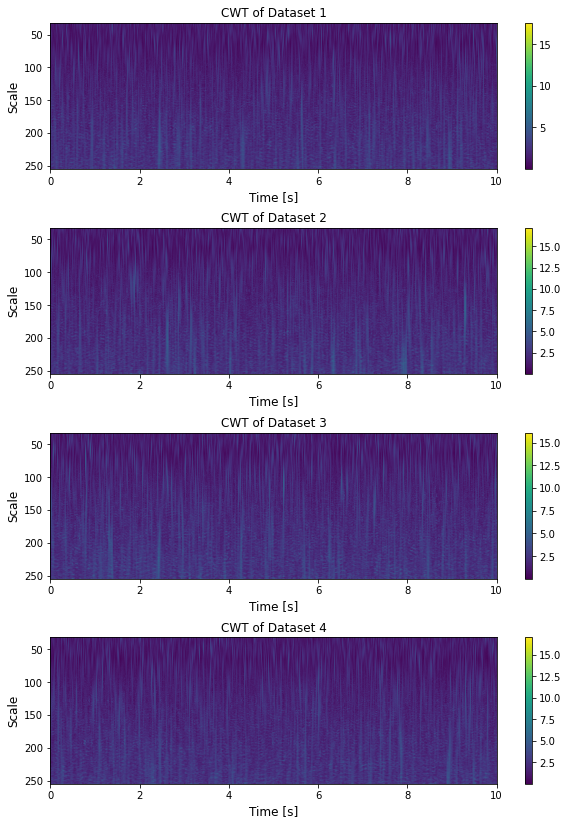

In [11]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_WG_100.png')

plt.show()


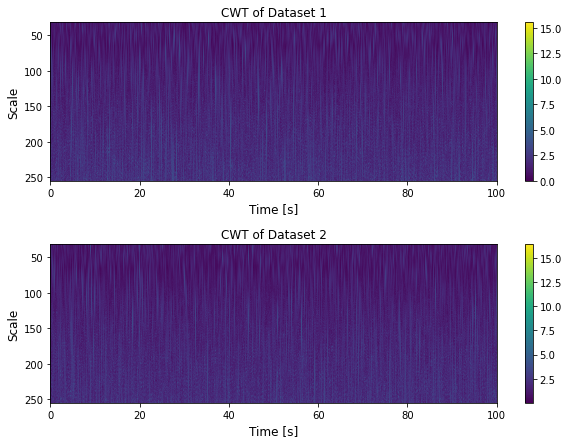

In [12]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG_10bit/0000.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG_10bit/0001.csv",
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_WG_10bit.png')

plt.show()


# CWT Plots of Zener diode based Noise Generators

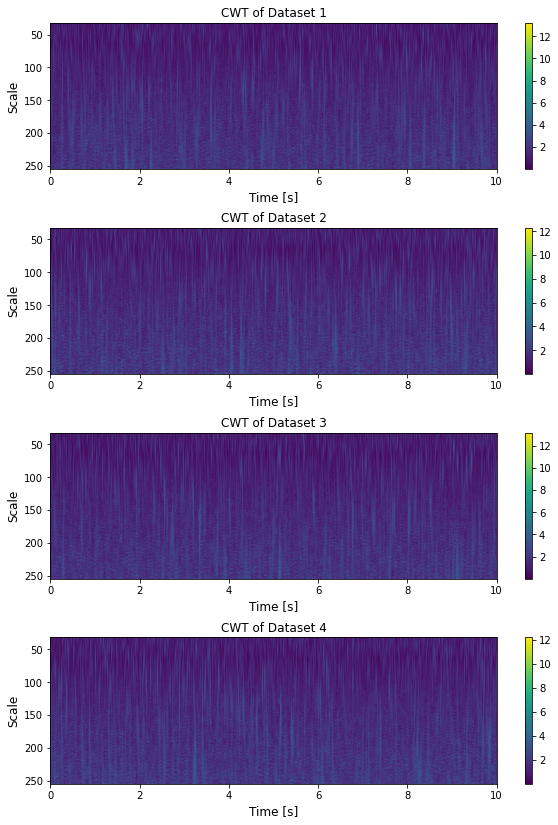

In [13]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_Z1_lp.png')

plt.show()


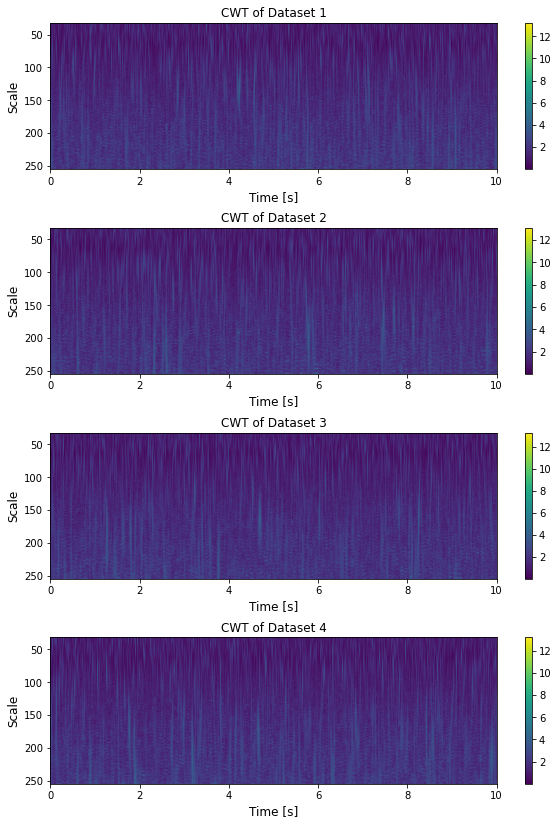

In [14]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_Z1_no_lp.png')

plt.show()


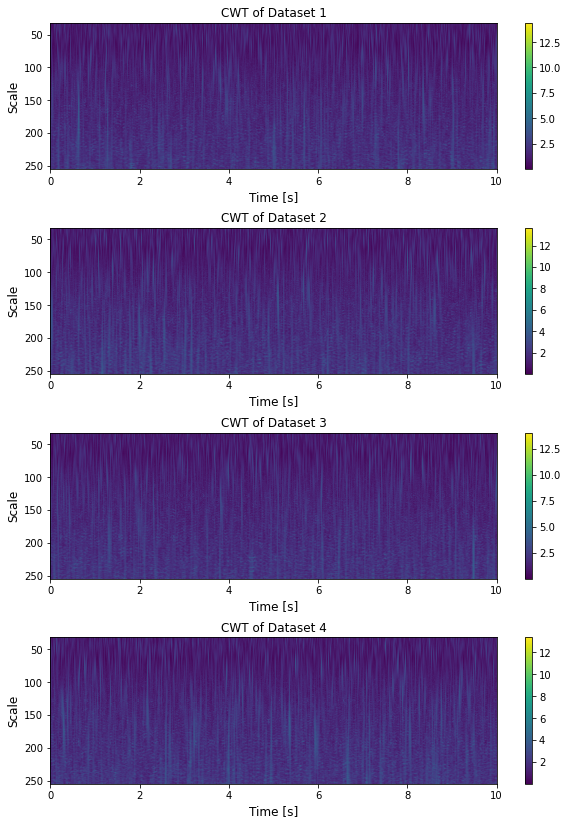

In [15]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_Z2_lp.png')

plt.show()


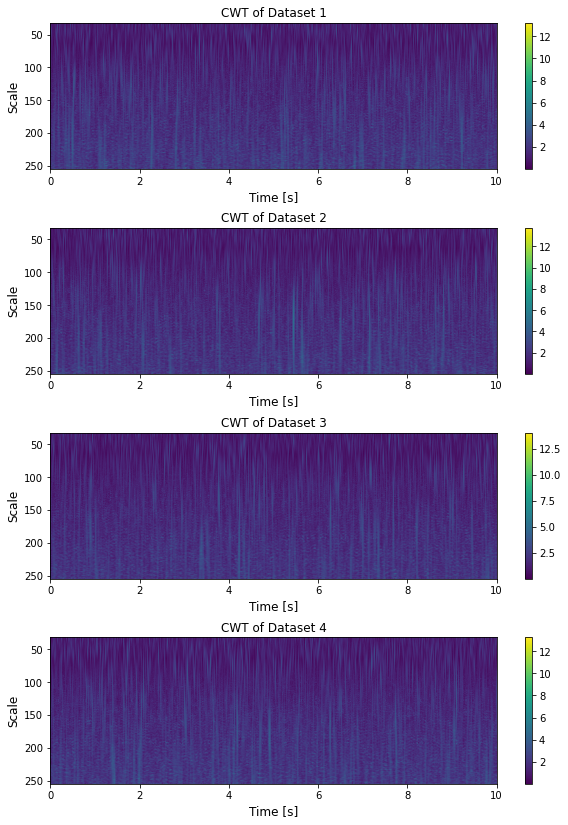

In [16]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'}, inplace=True)
    return data['Value']

# Function to perform Continuous Wavelet Transform
def compute_cwt(value, scales, wavelet_name, fs_downsampled):
    return pywt.cwt(value, scales, wavelet_name, sampling_period=1/fs_downsampled)

# Define the scales for the CWT
scales = np.arange(32, 256)

# Define the wavelet
wavelet_name = 'morl'

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/4.csv"
]

# Original sampling frequency and downsampling factor
fs_original = 1e6
sample_rate = 100

# Plotting all datasets in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(10, 14))

for i, filepath in enumerate(filepaths):
    # Load and process data
    value = load_and_process(filepath)
    
    # Perform downsampling
    sampled_signal = value[::sample_rate]
    fs_downsampled = fs_original / sample_rate
    duration = len(sampled_signal) / fs_downsampled
    
    # Perform CWT
    cwt_matr, freqs = compute_cwt(sampled_signal, scales, wavelet_name, fs_downsampled)
    
    # Plot in the corresponding subplot
    ax = axs[i]
    cax = ax.imshow(np.abs(cwt_matr), extent=[0, duration, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    ax.set_title(f'CWT of Dataset {i+1}', fontsize = 12)
    ax.set_ylabel('Scale', fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    
    # Add a color bar to each subplot
    fig.colorbar(cax, ax=ax)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/Wavelets/Wv_Z2_no_lp.png')

plt.show()
